In [1]:
import datetime
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Density dictionary

In [2]:
fn = r'C:\Users\Default\Documents\transect_densities.xlsx'
xl = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
xl.keys()

for values in xl.keys():
    print(xl[values])

   1955-05-31  1955-06-11  1955-06-23  1955-07-04  1955-11-10  1955-11-22  \
0        0.32        0.37        0.33        0.39        0.40        0.26   
1        0.28        0.34        0.39        0.33        0.22        0.26   
2        0.32        0.32        0.37        0.44        0.23        0.23   
3        0.29        0.31        0.39        0.38        0.24        0.24   
4        0.27        0.36        0.32        0.40        0.20        0.28   
5        0.30        0.30        0.40        0.30        0.24        0.26   
6        0.33        0.36        0.37        0.41        0.26        0.26   
7        0.28        0.35        0.38        0.39        0.26        0.26   
8        0.31        0.32         NaN        0.47        0.34        0.30   
9        0.29        0.31         NaN        0.35        0.26        0.26   

   1955-11-30  1955-12-31  1956-01-29  1956-02-27  1956-03-29  
0        0.26        0.28        0.20        0.27        0.30  
1        0.27        0.2

In [3]:
for values in xl.keys():
    
    xl[values].loc['avg'] = xl[values].mean()
    xl[values].loc['stdv'] = xl[values].std()

    xl[values] = xl[values].T
    xl[values] = xl[values].resample('10D').mean()

    xl[values].reset_index(inplace=True)
    xl[values]['day'] = xl[values]['index'].dt.day
    xl[values]['month'] = xl[values]['index'].dt.month
    xl[values]['year'] = xl[values]['index'].dt.year

    xl[values] = xl[values].sort_values(by="index")
    xl[values].set_index('index', inplace=True)
    
    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 5][cols]
    xl[values].dropna(inplace=True)
    
    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 6][cols]
    xl[values].dropna(inplace=True)

    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 7][cols]
    xl[values].dropna(inplace=True)

    cols = ['month']
    xl[values][cols] = xl[values][xl[values][cols] != 8][cols]
    xl[values].dropna(inplace=True)
    
    print(xl[values])

               0     1     2     3     4     5     6     7     8     9    avg  \
index                                                                           
1955-11-07  0.40  0.22  0.23  0.24  0.20  0.24  0.26  0.26  0.34  0.26  0.265   
1955-11-17  0.26  0.26  0.23  0.24  0.28  0.26  0.26  0.26  0.30  0.26  0.261   

                stdv  day  month  year  
index                                   
1955-11-07  0.057140    7   11.0  1955  
1955-11-17  0.018138   17   11.0  1955  
               0     1     2     3     4     5     6     7     8     9    avg  \
index                                                                           
1958-04-26  0.32  0.29  0.38  0.34  0.36  0.31  0.35  0.33  0.29  0.34  0.331   
1958-11-02  0.25  0.26  0.26  0.24  0.25  0.23  0.25  0.25  0.24  0.24  0.247   
1958-12-02  0.34  0.30  0.27  0.27  0.26  0.25  0.26  0.28  0.26  0.28  0.277   
1959-01-01  0.28  0.26  0.25  0.26  0.26  0.28  0.27  0.28  0.24  0.28  0.266   
1959-01-31  0.28  0.26  0

               0     1     2     3     4     5     6     7     8     9    avg  \
index                                                                           
1968-09-17  0.18  0.27  0.20  0.30  0.22  0.25  0.39  0.25  0.22  0.22  0.250   
1968-10-17  0.28  0.41  0.32  0.37  0.25  0.29  0.41  0.36  0.33  0.34  0.336   
1968-11-16  0.34  0.26  0.30  0.31  0.28  0.31  0.30  0.28  0.30  0.31  0.299   
1968-12-16  0.28  0.25  0.29  0.34  0.33  0.30  0.32  0.26  0.30  0.29  0.296   
1969-01-15  0.35  0.36  0.30  0.32  0.29  0.28  0.35  0.28  0.33  0.29  0.315   
1969-02-14  0.41  0.33  0.29  0.31  0.33  0.38  0.34  0.31  0.34  0.32  0.336   
1969-03-16  0.31  0.35  0.30  0.35  0.38  0.32  0.34  0.29  0.36  0.34  0.334   
1969-04-15  0.35  0.36  0.32  0.34  0.31  0.32  0.33  0.38  0.33  0.32  0.336   
1969-09-12  0.30  0.33  0.32  0.32  0.33  0.33  0.33  0.33  0.33  0.31  0.323   
1969-10-12  0.34  0.33  0.29  0.29  0.32  0.33  0.32  0.34  0.31  0.33  0.320   
1969-11-11  0.36  0.34  0.34

               0     1     2     3     4    avg      stdv  day  month  year
index                                                                      
1977-10-19  0.28  0.23  0.29  0.29  0.25  0.268  0.024000   19   10.0  1977
1977-11-18  0.24  0.26  0.26  0.31  0.28  0.270  0.023664   18   11.0  1977
1977-12-18  0.30  0.27  0.26  0.28  0.27  0.276  0.013565   18   12.0  1977
1978-01-17  0.25  0.25  0.30  0.31  0.27  0.276  0.024980   17    1.0  1978
1978-02-16  0.32  0.34  0.34  0.35  0.32  0.334  0.012000   16    2.0  1978
1978-03-18  0.32  0.30  0.29  0.31  0.33  0.310  0.014142   18    3.0  1978
1978-04-17  0.30  0.27  0.30  0.32  0.31  0.300  0.016733   17    4.0  1978
1978-09-14  0.26  0.23  0.29  0.26  0.27  0.262  0.019391   14    9.0  1978
1978-10-14  0.25  0.24  0.30  0.27  0.25  0.262  0.021354   14   10.0  1978
               0     1     2     3     4    avg      stdv  day  month  year
index                                                                      
1978-09-20  

# Depth dictionary

In [4]:
fn = r'C:\Users\Default\Documents\transect_depths.xlsx'
xl2 = pd.read_excel(fn, engine='openpyxl', sheet_name=None, parse_dates=True, index_col=0)
xl2.keys()

for values in xl2.keys():
    print(xl2[values])

     1955-05-31  1955-06-11  1955-06-23  1955-07-04  1955-11-22  1955-12-31
0          31.0          11        23.0           4          22        31.0
1          58.0          55        36.0          34          25        25.0
2          60.0          60        68.0           8          21        30.0
3          41.0          50        42.0          40          20        13.0
4          70.0          62        50.0          27          24        40.0
..          ...         ...         ...         ...         ...         ...
96          NaN          48         NaN          40          34         NaN
97          NaN          40         NaN          12           7         NaN
98          NaN          43         NaN          36          14         NaN
99          NaN          32         NaN          48          52         NaN
100         NaN          30         NaN          38          59         NaN

[101 rows x 6 columns]
     1959-01-07  1959-02-04  1959-03-07  1958-05-04  1958-06-02 

In [5]:
for values in xl2.keys():
    
    xl2[values].loc['avg'] = xl2[values].mean()
    xl2[values].loc['std'] = xl2[values].std()

    xl2[values] = xl2[values].T
    xl2[values] = xl2[values].resample('10D').mean()

    xl2[values].reset_index(inplace=True)
    xl2[values]['day'] = xl2[values]['index'].dt.day
    xl2[values]['month'] = xl2[values]['index'].dt.month
    xl2[values]['year'] = xl2[values]['index'].dt.year

    xl2[values] = xl2[values].sort_values(by="index")
    xl2[values].set_index('index', inplace=True)

    print(xl2[values]);

               0     1     2     3     4     5     6     7     8     9  ...  \
index                                                                   ...   
1955-05-31  31.0  58.0  60.0  41.0  70.0  39.0  82.0  73.0   9.0  40.0  ...   
1955-06-10  11.0  55.0  60.0  50.0  62.0  20.0  60.0  35.0  73.0  47.0  ...   
1955-06-20  23.0  36.0  68.0  42.0  50.0  59.0  40.0  65.0  62.0  59.0  ...   
1955-06-30   4.0  34.0   8.0  40.0  27.0  15.0  33.0  10.0  25.0  38.0  ...   
1955-07-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-07-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-07-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-08-09   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-08-19   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-08-29   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1955-09-08   NaN   NaN   NaN   NaN   NaN   NaN   NaN

               0     1     2     3     4     5     6     7     8     9  ...  \
index                                                                   ...   
1970-01-31  31.0  10.0  17.0  22.0  10.0  20.0  23.0  13.0  25.0  30.0  ...   
1970-02-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1970-02-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1970-03-02   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1970-03-12   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1972-04-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1972-04-20   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1972-04-30   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1972-05-10   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
1972-05-20  20.0  10.0  12.0   1.0  46.0   2.0  20.0

               0     1     2     3     4     5     6     7     8     9  ...  \
index                                                                   ...   
1988-12-10  10.0  45.0  36.0  23.0  30.0  23.0  23.0  12.0  36.0  12.0  ...   
1988-12-20  20.0  49.0  32.0  28.0  23.0  25.0  40.0  16.0  21.0  20.0  ...   
1988-12-30  30.0  44.0  30.0  28.0  26.0  20.0  39.0  30.0  20.0  21.0  ...   
1989-01-09  10.0  25.0  28.0  12.0  54.0  29.0  32.0  22.0  45.0  61.0  ...   
1989-01-19  21.0  31.0  27.0  29.0  46.0  28.0  19.0  31.0  21.0  41.0  ...   
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
1991-02-18  20.0  31.0  37.0  22.0  30.0  38.0  50.0  62.0  44.0  28.0  ...   
1991-02-28  28.0  38.0  43.0  40.0  56.0  35.0  22.0  48.0  35.0  29.0  ...   
1991-03-10  10.0  36.0  49.0  30.0  38.0  45.0  50.0  50.0  38.0  31.0  ...   
1991-03-20  20.0  22.0  48.0  53.0  80.0  45.0  31.0  10.0  28.0  12.0  ...   
1991-03-30  31.0  47.0  50.0  63.0  58.0  24.0  18.0

# change in depth and density

In [6]:
#depth
len(xl2['31'].avg.diff())

85

In [7]:
#density
len(xl['31'].avg.diff())

53

# Wind

In [8]:
import numpy as np

#Pythagora's Theorem function
pyt = lambda x, y: np.sqrt(x**2 + y**2)

# Example
pyt(3,2)

3.605551275463989

In [340]:
NP31 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_31.WUV",sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])
NP30 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_30.WUV",sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])
NP27 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_27.WUV",sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])
NP26 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_26.WUV",sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])
NP25 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_25.WUV",sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])
NP28 = pd.read_table(r"C:\Users\Default\Documents\W99_clean\WIND\NP_28.WUV",sep="\s+", index_col=False, header=None, na_values=9999, usecols=[0,1,2,3,4,10,11], names=['station_id', 'year', 'month', 'day','time', 'lat', 'long', 'air_temperature', 'relative_humidity', 'sea_level_pressure','u_component_of_wind','v_component_of_wind', 'total_cloudiness', 'low_cloudiness', 'surface_temperature'])


dictionary = {"NP31": NP31,"NP30": NP30, "NP27": NP27, "NP26": NP26, "NP25": NP25, "NP28": NP28}

i3 = (NP25, NP26, NP27, NP30, NP31, NP28)

for values in dictionary.keys():
    dictionary[values].dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

    cols = ['year', 'month', 'day']
    dictionary[values]['date'] = dictionary[values][cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
    dictionary[values]['date'] = pd.to_datetime(dictionary[values].date, infer_datetime_format=True)

    dictionary[values].set_index('date', inplace=True)

    rols = ['month', 'year']
    dictionary[values]['month_year'] = dictionary[values][rols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

    dols = ['u_component_of_wind' , 'v_component_of_wind']
    dictionary[values]['wind_speed']= dictionary[values][dols].apply(lambda x: round(pyt(x[0],x[1]),2), axis="columns")
    
    cols = ['wind_speed']
    dictionary[values][cols] = dictionary[values][dictionary[values][cols] > 10][cols]
    dictionary[values].dropna(inplace=True)

    dictionary[values] = dictionary[values].resample('D').sum()

    print(dictionary[values])

            station_id  year  month  day  time  u_component_of_wind  \
date                                                                  
1988-12-06          31    88     12    6     6                  9.2   
1988-12-07           0     0      0    0     0                  0.0   
1988-12-08           0     0      0    0     0                  0.0   
1988-12-09           0     0      0    0     0                  0.0   
1988-12-10           0     0      0    0     0                  0.0   
...                ...   ...    ...  ...   ...                  ...   
1991-03-11           0     0      0    0     0                  0.0   
1991-03-12           0     0      0    0     0                  0.0   
1991-03-13           0     0      0    0     0                  0.0   
1991-03-14           0     0      0    0     0                  0.0   
1991-03-15          31    91      3   15    21                 -7.8   

            v_component_of_wind  wind_speed  
date                          

# Dataframes

In [341]:
df = pd.DataFrame({'stdv_density':xl['31'].stdv.diff(), 'density_diff':xl['31'].avg.diff(), 'depth_diff':xl2['31'].avg.diff(), 'wind_speed':dictionary['NP31'].wind_speed}, index=None, columns=None)

df = df.resample('10D').sum()

cols = ['density_diff']
df[cols] = df[df[cols] != 0][cols]
df.dropna()

cols = ['depth_diff']
df[cols] = df[df[cols] != 0][cols]
df.dropna()

cols = ['wind_speed']
df[cols] = df[df[cols] != 0][cols]
df.dropna()

df.dropna(inplace=True)
df.head(50)

,stdv_density,density_diff,depth_diff,wind_speed
1988-12-26,-0.018669,2.999996e-03,2.215686,183.13
1989-01-05,0.005401,2.700000e-02,2.470588,273.06
1989-01-25,0.016919,7.000002e-03,0.784314,65.16
1989-02-04,-0.022014,-1.500000e-02,5.529412,98.10
1989-02-14,-0.000199,-6.000003e-03,2.313725,147.09
1989-02-24,-0.003025,6.000003e-03,-1.509804,102.03
1989-03-06,0.000776,-9.999990e-04,4.313725,66.10
1989-03-26,0.005293,6.000000e-03,0.294118,10.98
1989-04-05,0.000730,-3.000000e-03,-0.607843,32.99
1989-04-15,-0.007914,2.000001e-03,0.117647,45.05


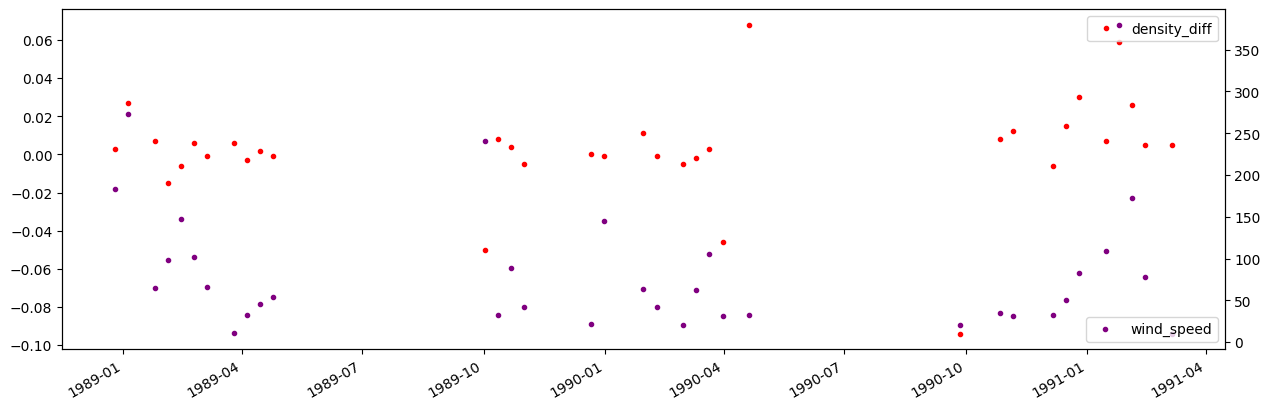

In [342]:
plt.figure(figsize=(15,5))
df.density_diff.plot(color='red', style='.') #no need to specify for first axis
plt.legend()
df.wind_speed.plot(kind='line', secondary_y=True, ax=plt.gca(), style=".", color='purple')
plt.legend(loc='lower right')

In [343]:
df2 = pd.DataFrame({'stdv_density':xl['30'].stdv.diff(), 'density_diff':xl['30'].avg.diff(), 'depth_diff':xl2['30'].avg.diff(), 'wind_speed':dictionary['NP30'].wind_speed}, index=None, columns=None)

df2 = df2.resample('10D').sum()

cols = ['density_diff']
df2[cols] = df2[df2[cols] != 0][cols]
df2.dropna()

cols = ['depth_diff']
df2[cols] = df2[df2[cols] != 0][cols]
df2.dropna()

cols = ['wind_speed']
df2[cols] = df2[df2[cols] != 0][cols]
df2.dropna()

df2.dropna(inplace=True)
df2

,stdv_density,density_diff,depth_diff,wind_speed
1987-11-30,-0.016369,-0.032,-0.823529,20.05
1987-12-10,-0.000798,-0.017,1.352941,120.13
1987-12-20,0.013352,0.013,-0.078431,56.05
1988-01-29,0.010760,0.059,-1.490196,251.41
1988-03-19,0.010757,0.019,3.411765,41.03
1988-03-29,-0.002781,-0.018,0.549020,10.04
1988-04-08,-0.009170,0.006,-2.549020,142.08
1988-04-18,-0.010785,0.024,3.196078,209.54
1988-04-28,0.020723,0.017,-0.196078,20.99
1988-09-05,-0.038327,-0.152,7.960784,74.16


In [344]:
df3 = pd.DataFrame({'stdv_density':xl['27'].stdv.diff(), 'density_diff':xl['27'].avg.diff(), 'depth_diff':xl2['27'].avg.diff(), 'wind_speed':dictionary['NP27'].wind_speed}, index=None, columns=None)

df3 = df3.resample('10D').sum()

cols = ['density_diff']
df3[cols] = df3[df3[cols] != 0][cols]
df3.dropna()

cols = ['depth_diff']
df3[cols] = df3[df3[cols] != 0][cols]
df3.dropna()

cols = ['wind_speed']
df3[cols] = df3[df3[cols] != 0][cols]
df3.dropna()

df3.dropna(inplace=True)
df3

,stdv_density,density_diff,depth_diff,wind_speed


In [345]:
df4 = pd.DataFrame({'stdv_density':xl['26'].stdv.diff(), 'density_diff':xl['26'].avg.diff(), 'depth_diff':xl2['26'].avg.diff(), 'wind_speed':dictionary['NP26'].wind_speed}, index=None, columns=None)

df4 = df4.resample('10D').sum()

cols = ['density_diff']
df4[cols] = df4[df4[cols] != 0][cols]
df4.dropna()

cols = ['depth_diff']
df4[cols] = df4[df4[cols] != 0][cols]
df4.dropna()

cols = ['wind_speed']
df4[cols] = df4[df4[cols] != 0][cols]
df4.dropna()

df4.dropna(inplace=True)
df4

,stdv_density,density_diff,depth_diff,wind_speed
1983-09-18,-0.010285,-2.000000e-02,2.450980,10.04
1983-09-28,0.015121,8.999999e-02,-0.666667,145.15
1983-10-08,-0.002663,5.960464e-09,0.176471,22.98
1983-10-18,0.007072,4.000002e-03,0.372549,79.03
1983-10-28,-0.003158,6.000000e-03,0.411765,73.05
1983-11-07,-0.028619,-1.799999e-02,3.058824,275.24
1983-11-27,0.000854,7.999992e-03,0.627451,43.01
1983-12-07,-0.002315,1.000001e-02,-0.450980,65.06
1983-12-17,0.002715,-1.400000e-02,2.137255,304.88
1983-12-27,0.005294,-2.400000e-02,0.764706,82.19


In [346]:
df5 = pd.DataFrame({'stdv_density':xl['25'].stdv.diff(), 'density_diff':xl['25'].avg.diff(), 'depth_diff':xl2['25'].avg.diff(), 'wind_speed':dictionary['NP25'].wind_speed}, index=None, columns=None)

df5 = df5.resample('10D').sum()

cols = ['density_diff']
df5[cols] = df5[df5[cols] != 0][cols]
df5.dropna()

cols = ['depth_diff']
df5[cols] = df5[df5[cols] != 0][cols]
df5.dropna()

cols = ['wind_speed']
df5[cols] = df5[df5[cols] != 0][cols]
df5.dropna()

df5.dropna(inplace=True)
df5

,stdv_density,density_diff,depth_diff,wind_speed


In [347]:
df6 = pd.DataFrame({'stdv_density':xl['28'].stdv.diff(), 'density_diff':xl['28'].avg.diff(), 'wind_speed':dictionary['NP28'].wind_speed}, index=None, columns=None)

df6 = df6.resample('10D').sum()

cols = ['density_diff']
df6[cols] = df6[df6[cols] != 0][cols]
df6.dropna()

cols = ['wind_speed']
df6[cols] = df6[df6[cols] != 0][cols]
df6.dropna()

df6.dropna(inplace=True)
df6

,stdv_density,density_diff,wind_speed
1986-09-09,0.024630,0.038,45.86
1986-10-09,-0.012379,-0.006,30.12
1986-10-29,-0.017161,0.006,22.01
1986-11-08,0.001543,0.004,146.91
1986-11-28,0.007923,0.010,84.02
1986-12-08,-0.041725,0.004,210.27
1986-12-18,0.002451,0.004,201.85
1986-12-28,0.010503,0.008,52.08
1987-01-17,-0.008372,0.002,30.06
1987-03-08,0.012288,-0.006,90.99


# wind & change in density

In [348]:
import scipy as sp
from scipy import stats

X = list(df.wind_speed) + list(df2.wind_speed) + list(df3.wind_speed) + list(df4.wind_speed) + list(df5.wind_speed) 
#+ list(df6.wind_speed)
Y = list(df.density_diff) + list(df2.density_diff) + list(df3.density_diff) + list(df4.density_diff) + list(df5.density_diff) 
#+ list(df6.density_diff)
res = sp.stats.linregress(X, Y)
res

LinregressResult(slope=6.535385273618185e-05, intercept=-0.005439331361429561, rvalue=0.15885268912197392, pvalue=0.1182120483400062, stderr=4.145635879533248e-05)

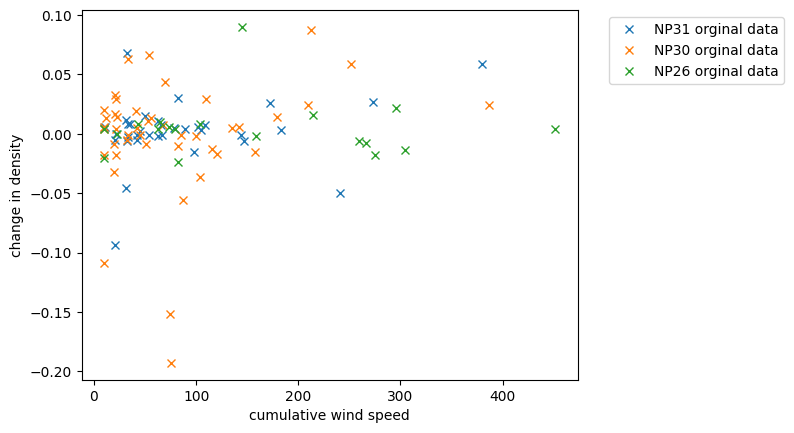

In [349]:
plt.plot(df.wind_speed, df.density_diff, 'x', label='NP31 orginal data')
plt.plot(df2.wind_speed, df2.density_diff, 'x', label='NP30 orginal data')
#plt.plot(df3.wind_speed, df3.density_diff, 'x', label='NP27 orginal data')
plt.plot(df4.wind_speed, df4.density_diff, 'x', label='NP26 orginal data')
#plt.plot(df5.wind_speed, df5.density_diff, 'x', label='NP25 orginal data')
#plt.plot(df6.wind_speed, df6.density_diff, 'x', label='NP28 orginal data')

Z = []
for point in X:
    Z.append(res.intercept + res.slope*point)

#plt.plot(X, Z, 'r', label='fitted line')

plt.xlabel('cumulative wind speed')
plt.ylabel('change in density')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# wind speed and change in depth

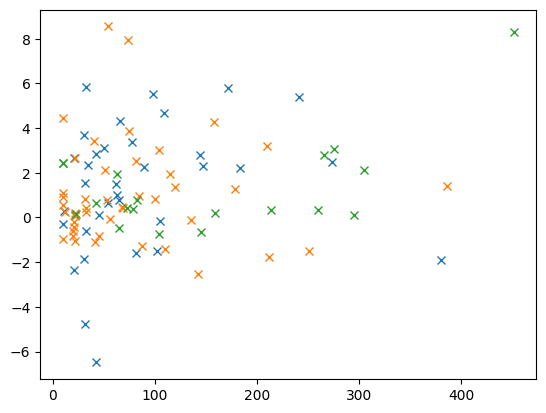

In [350]:
plt.plot(df.wind_speed, df.depth_diff, 'x', label='NP31 orginal data')
plt.plot(df2.wind_speed, df2.depth_diff, 'x', label='NP30 orginal data')
#plt.plot(df3.wind_speed, df3.depth_diff, 'x', label='NP27 orginal data')
plt.plot(df4.wind_speed, df4.depth_diff, 'x', label='NP26 orginal data')
#plt.plot(df5.wind_speed, df5.depth_diff, 'x', label='NP25 orginal data')


# wind & stdv density

In [351]:
import scipy as sp
from scipy import stats

X = list(df.wind_speed) + list(df2.wind_speed) + list(df3.wind_speed) + list(df4.wind_speed) + list(df5.wind_speed)
Y = list(df.stdv_density) + list(df2.stdv_density) + list(df3.stdv_density) + list(df4.stdv_density) + list(df5.stdv_density)
res = sp.stats.linregress(df.wind_speed, df.stdv_density)
res

LinregressResult(slope=1.3442381733554991e-05, intercept=-0.0007381729717229957, rvalue=0.07637289163529548, pvalue=0.662795522006626, stderr=3.0549895663147424e-05)

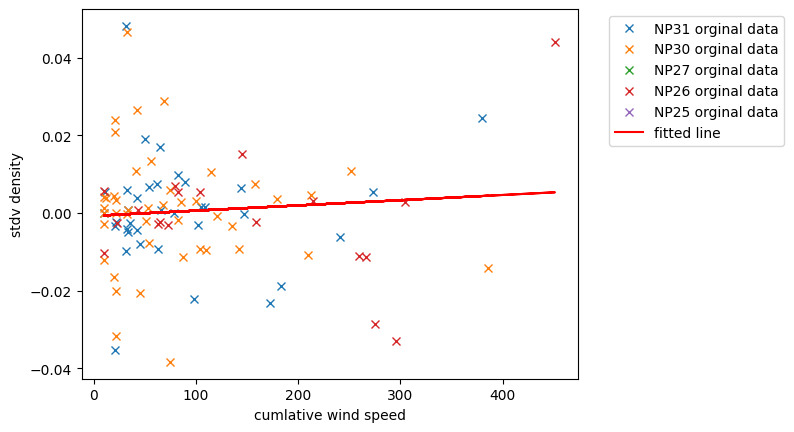

In [352]:
plt.plot(df.wind_speed, df.stdv_density, 'x', label='NP31 orginal data')
plt.plot(df2.wind_speed, df2.stdv_density, 'x', label='NP30 orginal data')
plt.plot(df3.wind_speed, df3.stdv_density, 'x', label='NP27 orginal data')
plt.plot(df4.wind_speed, df4.stdv_density, 'x', label='NP26 orginal data')
plt.plot(df5.wind_speed, df5.stdv_density, 'x', label='NP25 orginal data')

Z = []
for point in X:
    Z.append(res.intercept + res.slope*point)

plt.plot(X, Z, 'r', label='fitted line')
#plt.plot(df.wind_speed, res.intercept + res.slope*df.wind_speed, 'r', label='fitted line')

plt.xlabel('cumlative wind speed')
plt.ylabel('stdv density')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# change in depth and density

In [353]:
import scipy as sp
from scipy import stats

X = list(df.depth_diff) + list(df2.depth_diff) + list(df3.depth_diff) + list(df4.depth_diff) + list(df5.depth_diff)
Y = list(df.density_diff) + list(df2.density_diff) + list(df3.density_diff) + list(df4.density_diff) + list(df5.density_diff)

res = sp.stats.linregress(X, Y)
res

LinregressResult(slope=-0.005431172715825296, intercept=0.0072435512864892125, rvalue=-0.3487503905402479, pvalue=0.000432641546250232, stderr=0.0014896451413946555)

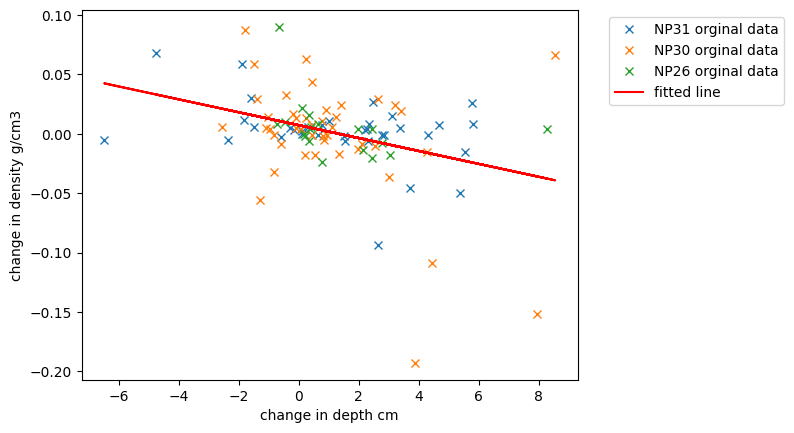

In [354]:
plt.plot(df.depth_diff, df.density_diff, 'x', label='NP31 orginal data')
plt.plot(df2.depth_diff, df2.density_diff, 'x', label='NP30 orginal data')
#plt.plot(df3.depth_diff, df3.density_diff, 'x', label='NP27 orginal data')
plt.plot(df4.depth_diff, df4.density_diff, 'x', label='NP26 orginal data')
#plt.plot(df5.depth_diff, df5.density_diff, 'x', label='NP25 orginal data')

#line of best fit
Z = []
for point in X:
    Z.append(res.intercept + res.slope*point)

plt.plot(X, Z, 'r', label='fitted line', ls='-')

plt.xlabel('change in depth cm')
plt.ylabel('change in density g/cm3')

plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# multi-linear regression

In [355]:
X = df[['depth_diff','wind_speed']]
X1 = X.append(df2[['depth_diff','wind_speed']])
X2 = X1.append(df3[['depth_diff','wind_speed']])
X3 = X2.append(df4[['depth_diff','wind_speed']])
X4 = X3.append(df5[['depth_diff','wind_speed']])
print(X4)

Y = df['density_diff']
Y1 = Y.append(df2['density_diff'])
Y2 = Y1.append(df3['density_diff'])
Y3 = Y2.append(df4['density_diff'])
Y4 = Y3.append(df5['density_diff'])
print(Y4)

            depth_diff  wind_speed
1988-12-26    2.215686      183.13
1989-01-05    2.470588      273.06
1989-01-25    0.784314       65.16
1989-02-04    5.529412       98.10
1989-02-14    2.313725      147.09
...                ...         ...
1984-02-15    0.098039      295.33
1984-02-25    0.333333      259.42
1984-03-06   -0.725490      104.20
1984-03-16    1.960784       63.08
1984-03-26    2.450980       10.06

[98 rows x 2 columns]
1988-12-26    0.003
1989-01-05    0.027
1989-01-25    0.007
1989-02-04   -0.015
1989-02-14   -0.006
              ...  
1984-02-15    0.022
1984-02-25   -0.006
1984-03-06    0.008
1984-03-16    0.004
1984-03-26    0.004
Name: density_diff, Length: 98, dtype: float64


In [356]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

X = X4[['depth_diff','wind_speed']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = Y4
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 -0.0010562089608754878
Coefficients: 
 [-6.09598627e-03  9.50962454e-05]
                            OLS Regression Results                            
Dep. Variable:           density_diff   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     9.953
Date:                Sun, 08 Aug 2021   Prob (F-statistic):           0.000119
Time:                        12:45:23   Log-Likelihood:                 190.42
No. Observations:                  98   AIC:                            -374.8
Df Residuals:                      95   BIC:                            -367.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [357]:
Y

1988-12-26    0.003
1989-01-05    0.027
1989-01-25    0.007
1989-02-04   -0.015
1989-02-14   -0.006
              ...  
1984-02-15    0.022
1984-02-25   -0.006
1984-03-06    0.008
1984-03-16    0.004
1984-03-26    0.004
Name: density_diff, Length: 98, dtype: float64

In [358]:
X
X['density_diff'] = Y
X

,const,depth_diff,wind_speed,density_diff
1988-12-26,1.0,2.215686,183.13,0.003
1989-01-05,1.0,2.470588,273.06,0.027
1989-01-25,1.0,0.784314,65.16,0.007
1989-02-04,1.0,5.529412,98.10,-0.015
1989-02-14,1.0,2.313725,147.09,-0.006
...,...,...,...,...
1984-02-15,1.0,0.098039,295.33,0.022
1984-02-25,1.0,0.333333,259.42,-0.006
1984-03-06,1.0,-0.725490,104.20,0.008
1984-03-16,1.0,1.960784,63.08,0.004


In [359]:
X

,const,depth_diff,wind_speed,density_diff
1988-12-26,1.0,2.215686,183.13,0.003
1989-01-05,1.0,2.470588,273.06,0.027
1989-01-25,1.0,0.784314,65.16,0.007
1989-02-04,1.0,5.529412,98.10,-0.015
1989-02-14,1.0,2.313725,147.09,-0.006
...,...,...,...,...
1984-02-15,1.0,0.098039,295.33,0.022
1984-02-25,1.0,0.333333,259.42,-0.006
1984-03-06,1.0,-0.725490,104.20,0.008
1984-03-16,1.0,1.960784,63.08,0.004


Text(0, 0.5, 'change in density')

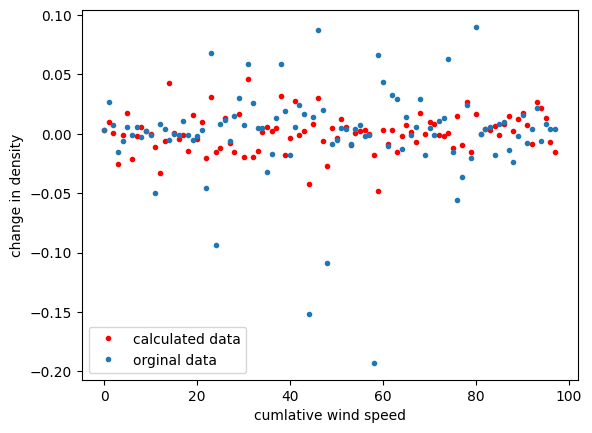

In [372]:
import random

wind_speed = X.wind_speed
change_in_depth = X.depth_diff
change_in_density = []

for wind_speed, change_in_depth in zip(wind_speed, change_in_depth):
    change_in_density.append(-0.0010562089608754878 + ((9.50962454e-05) * (wind_speed)) + ((-6.09598627e-03) * (change_in_depth)))

plt.plot(range(0,98), change_in_density, '.',color = 'red', label='calculated data')
plt.plot(range(0,98), X.density_diff,'.', label='orginal data')
plt.legend()
plt.xlabel('cumlative wind speed')
plt.ylabel('change in density')

Text(0.5, 1.0, 'How close the calculated data is to the orignal data')

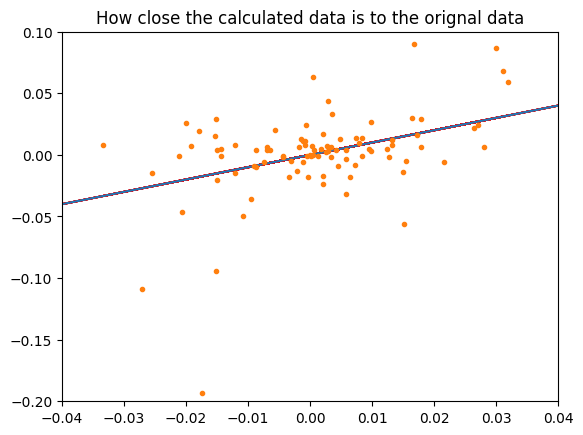

In [361]:
res = sp.stats.linregress(change_in_density, X.density_diff)
res

#line of best fit
Z = []
for point in change_in_density:
    Z.append(res.intercept + res.slope*point)

plt.plot(change_in_density, Z, 'r', label='fitted line')
plt.plot([-5,5],[-5,5])
plt.xlim(-0.04,0.04)
plt.ylim(-0.2,0.1)

plt.plot(change_in_density, X.density_diff, '.')
plt.title('How close the calculated data is to the orignal data')

In [362]:
res

LinregressResult(slope=1.000000000580065, intercept=-3.1696805553524388e-12, rvalue=0.41621269243130293, pvalue=2.0214811058870465e-05, stderr=0.22296701988958542)

# change in density and cumlative wind speed

Text(0.5, 1.0, 'NP31')

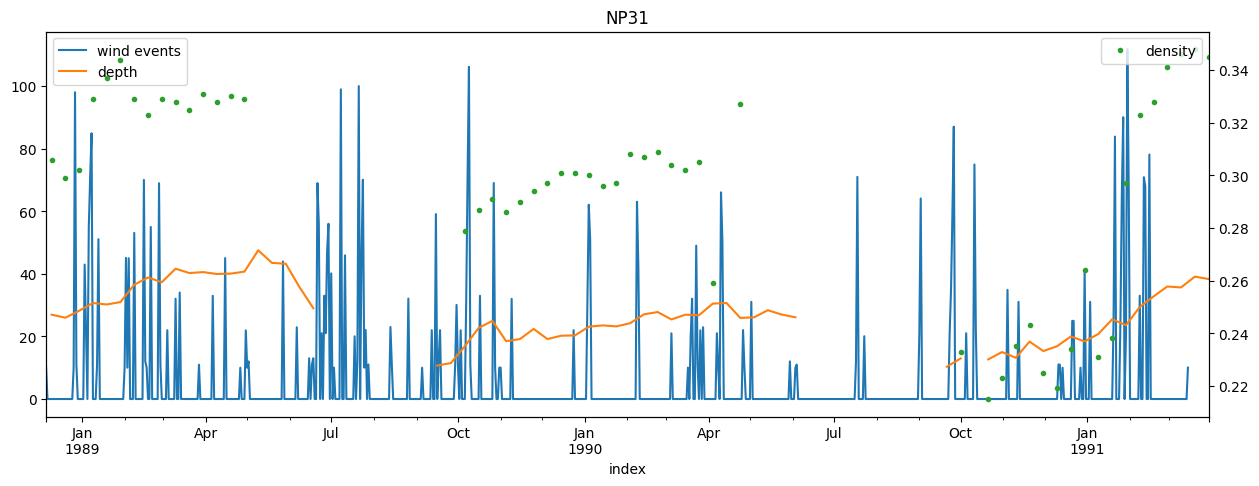

In [363]:
dictionary['NP31'].wind_speed.plot(figsize=(15,5), label='wind events')
plt.legend()
xl2['31'].avg.plot(label='depth')
plt.legend()
xl['31'].avg.plot(style='.', secondary_y=True, label='density')
plt.legend(loc='upper right')
plt.title('NP31')

Text(0.5, 1.0, 'NP30')

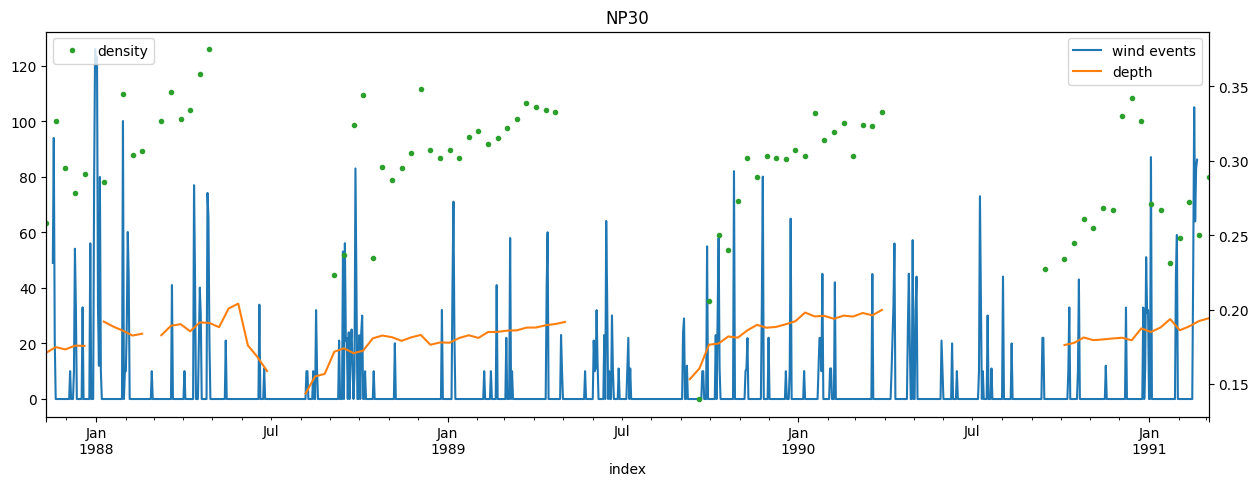

In [364]:
dictionary['NP30'].wind_speed.plot(figsize=(15,5), label='wind events')
plt.legend()
xl2['30'].avg.plot(label='depth')
plt.legend()
xl['30'].avg.plot(style='.', secondary_y=True, label='density')
plt.legend(loc='upper left')
plt.title('NP30')

Text(0.5, 1.0, 'NP26')

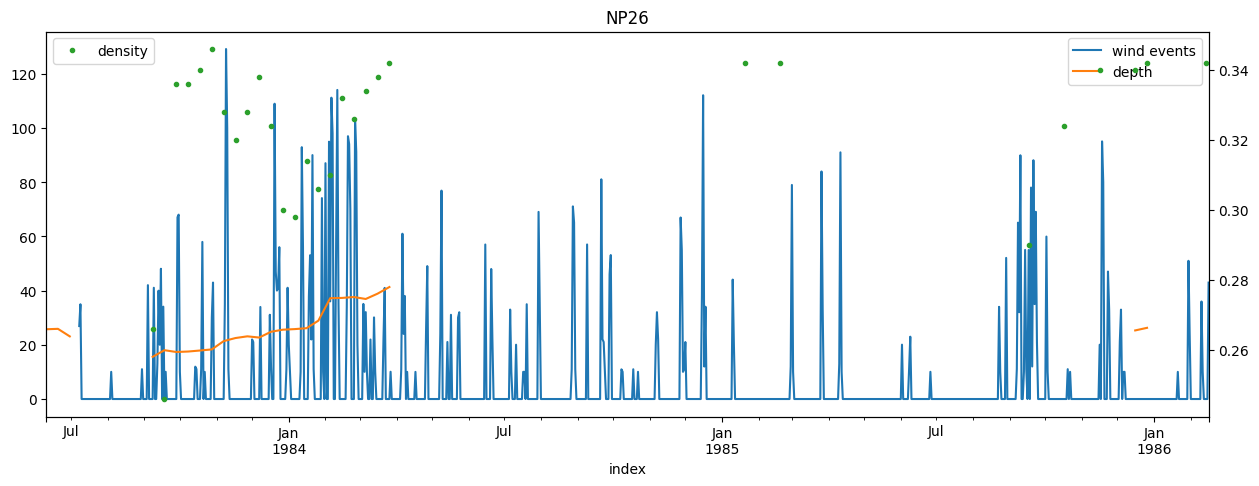

In [365]:
dictionary['NP26'].wind_speed.plot(figsize=(15,5), label='wind events')
plt.legend()
xl2['26'].avg.plot(label='depth')
plt.legend()
xl['26'].avg.plot(style='.', secondary_y=True, label='density')
plt.legend(loc='upper left')
plt.title('NP26')

# 3D Model

In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from mpl_toolkits.mplot3d import Axes3D

In [367]:
X

,const,depth_diff,wind_speed,density_diff
1988-12-26,1.0,2.215686,183.13,0.003
1989-01-05,1.0,2.470588,273.06,0.027
1989-01-25,1.0,0.784314,65.16,0.007
1989-02-04,1.0,5.529412,98.10,-0.015
1989-02-14,1.0,2.313725,147.09,-0.006
...,...,...,...,...
1984-02-15,1.0,0.098039,295.33,0.022
1984-02-25,1.0,0.333333,259.42,-0.006
1984-03-06,1.0,-0.725490,104.20,0.008
1984-03-16,1.0,1.960784,63.08,0.004


In [368]:
C = X[['depth_diff', 'wind_speed']].values.reshape(-1,2)
D = X['density_diff']

x = C[:, 0]
y = C[:, 1]
z = D

x_pred = np.linspace(-7, 9, 30)   # range of porosity values
y_pred = np.linspace(10, 452, 50)  # range of brittleness values

xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

ols = linear_model.LinearRegression()
model = ols.fit(C, D)
predicted = model.predict(model_viz)

r2 = model.score(C, D)

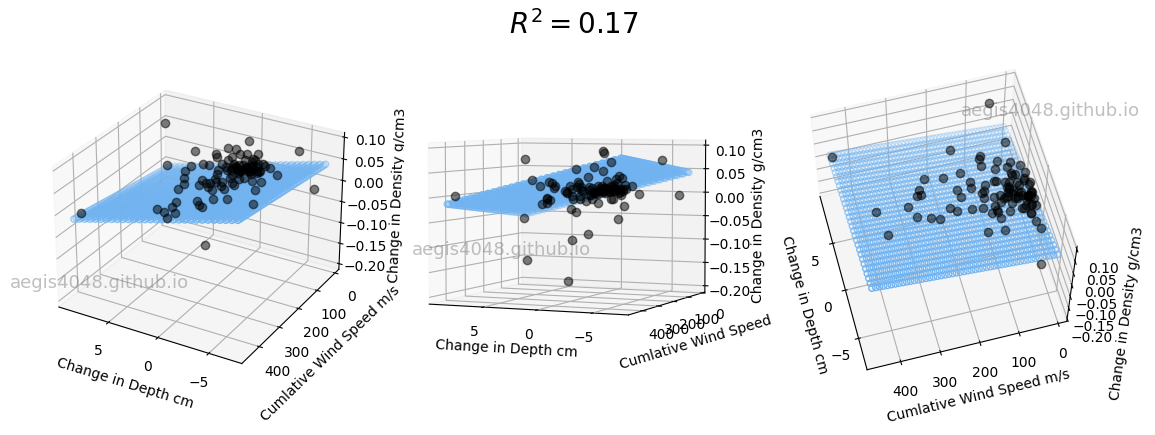

In [369]:
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('Change in Depth cm', fontsize=10)
    ax.set_ylabel('Cumlative Wind Speed m/s', fontsize=10)
    ax.set_zlabel('Change in Density g/cm3', fontsize=10)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [370]:
model.coef_

array([-6.09598627e-03,  9.50962454e-05])

In [371]:
model.intercept_

-0.0010562089608754878